### **資料處理**

In [67]:
import glob
import os
import re
import warnings
warnings.filterwarnings('ignore')
import csv
import openpyxl

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# 資料清理
# 授權 Colab 與你的 google 雲端硬碟帳戶連結
from google.colab import drive
drive.mount('/content/drive')

### **資料清理**

In [ ]:
# 本季
# 設定檔案路徑，並讀取資料（官網）
your_path = "/content/drive/MyDrive/exshop/QoQ/raw_data/new_shopline.xlsx"
shopline = pd.read_excel(f"{your_path}")

# 新增銷售管道欄位-官網
shopline.insert(2, "銷售管道", "shopline", True)

path_shopline = "/content/drive/MyDrive/exshop/QoQ/data/"
shopline.to_csv(f"{path_shopline}new_shopline.csv", index = False) #index: 列標籤是否要輸出

# 設定檔案路徑，並讀取資料（蝦皮）
your_path = "/content/drive/MyDrive/exshop/QoQ/raw_data/new_shopee.xlsx"
shopee = pd.read_excel(f"{your_path}")

# 新增銷售管道欄位-蝦皮
shopee.insert(2, "銷售管道", "shopee", True)

path_shopee = "/content/drive/MyDrive/exshop/QoQ/data/"
shopee.to_csv(f"{path_shopee}new_shopee.csv", index = False) #index: 列標籤是否要輸出


# 設定檔案路徑，並讀取資料（門市）
your_path = "/content/drive/MyDrive/exshop/QoQ/raw_data/new_store.xlsx"
store = pd.read_excel(f"{your_path}")

# 新增銷售管道欄位-門市
store.insert(2, "銷售管道", "store", True)

path_store = "/content/drive/MyDrive/exshop/QoQ/data/"
store.to_csv(f"{path_store}new_store.csv", index = False) #index: 列標籤是否要輸出


# 設定檔案路徑，並讀取資料（B2B）
your_path = "/content/drive/MyDrive/exshop/QoQ/raw_data/new_b2b.xlsx"
b2b = pd.read_excel(f"{your_path}")

# 新增銷售管道欄位-B2B
b2b.insert(2, "銷售管道", "B2B", True)

path_b2b = "/content/drive/MyDrive/exshop/QoQ/data/"
b2b.to_csv(f"{path_b2b}new_b2b.csv", index = False) #index: 列標籤是否要輸出


# 合併 data 資料夾內的所有 csv 檔
files_joined = os.path.join("/content/drive/MyDrive/exshop/QoQ/data/", "new*.csv")

# 回傳合併後的檔案
list_files = glob.glob(files_joined)

new_all = pd.concat(map(pd.read_csv, list_files), ignore_index = True)



# 刪除不必要欄位
new = new_all.drop(["sales no",
                "customer",
                "consignee",
                "invoice no",
                "invoice date",
                "category no",
                "subCategoryNo",
                "product no",
                "price",
                "tax",
                'equal'], axis = 1
               )


# columns: 要修改的原始欄位名稱與新欄位名稱對應, inplace: 是否直接修改資料表
new.rename(columns = {'ship date': '日期',
                       'product::category':'品類',
                       'product::subcategory':'品牌',
                       'product name':'商品名稱',
                       'quantity':'銷售數量',
                       'price_tax':'單品銷售金額',
                       'total':'銷售金額'},inplace = True
            )



# 新增月份欄位
for i in new.index:
  s = new.loc[i, '日期'][5:7]
  new.loc[i, '月份'] = s

# 將月份欄位移到最前面
col = new.pop('月份')
new.insert(loc = 0, column = '月份', value = col)

# 加入第一列 2023 Q3
q_new = input('本季(ex.2023 Q3)：')
new.insert(0, "銷售季度", f"{q_new}", True)


# 輸出合併後的檔案
your_path = "/content/drive/MyDrive/exshop/QoQ/data/"
new.to_csv(f"{your_path}new.csv", index = False) #index: 列標籤是否要輸出

In [ ]:
# 前一季
# 設定檔案路徑，並讀取資料（官網）
your_path = "/content/drive/MyDrive/exshop/QoQ/raw_data/old_shopline.xlsx"
shopline = pd.read_excel(f"{your_path}")

# 新增銷售管道欄位-官網
shopline.insert(2, "銷售管道", "shopline", True)

path_shopline = "/content/drive/MyDrive/exshop/QoQ/data/"
shopline.to_csv(f"{path_shopline}old_shopline.csv", index = False) #index: 列標籤是否要輸出

# 設定檔案路徑，並讀取資料（蝦皮）
your_path = "/content/drive/MyDrive/exshop/QoQ/raw_data/old_shopee.xlsx"
shopee = pd.read_excel(f"{your_path}")

# 新增銷售管道欄位-蝦皮
shopee.insert(2, "銷售管道", "shopee", True)

path_shopee = "/content/drive/MyDrive/exshop/QoQ/data/"
shopee.to_csv(f"{path_shopee}old_shopee.csv", index = False) #index: 列標籤是否要輸出


# 設定檔案路徑，並讀取資料（門市）
your_path = "/content/drive/MyDrive/exshop/QoQ/raw_data/old_store.xlsx"
store = pd.read_excel(f"{your_path}")

# 新增銷售管道欄位-門市
store.insert(2, "銷售管道", "store", True)

path_store = "/content/drive/MyDrive/exshop/QoQ/data/"
store.to_csv(f"{path_store}old_store.csv", index = False) #index: 列標籤是否要輸出


# 設定檔案路徑，並讀取資料（B2B）
your_path = "/content/drive/MyDrive/exshop/QoQ/raw_data/old_b2b.xlsx"
b2b = pd.read_excel(f"{your_path}")

# 新增銷售管道欄位-B2B
b2b.insert(2, "銷售管道", "B2B", True)

path_b2b = "/content/drive/MyDrive/exshop/QoQ/data/"
b2b.to_csv(f"{path_b2b}old_b2b.csv", index = False) #index: 列標籤是否要輸出


# 合併 data 資料夾內的所有 csv 檔
files_joined = os.path.join("/content/drive/MyDrive/exshop/QoQ/data", "old*.csv")

# 回傳合併後的檔案
list_files = glob.glob(files_joined)

old_all = pd.concat(map(pd.read_csv, list_files), ignore_index = True)



# 刪除不必要欄位
old = old_all.drop(["sales no",
                "customer",
                "consignee",
                "invoice no",
                "invoice date",
                "category no",
                "subCategoryNo",
                "product no",
                "price",
                "tax",
                'equal'], axis = 1
               )


# columns: 要修改的原始欄位名稱與新欄位名稱對應, inplace: 是否直接修改資料表
old.rename(columns = {'ship date': '日期',
                       'product::category':'品類',
                       'product::subcategory':'品牌',
                       'product name':'商品名稱',
                       'quantity':'銷售數量',
                       'price_tax':'單品銷售金額',
                       'total':'銷售金額'},inplace = True
            )



# 新增月份欄位
for i in old.index:
  s = old.loc[i, '日期'][5:7]
  old.loc[i, '月份'] = s

# 將月份欄位移到最前面
col = old.pop('月份')
old.insert(loc = 0, column = '月份', value = col)

# 加入第一列 銷售季度
q_old = input('上季(ex.2022 Q3)：')
old.insert(0, "銷售季度", f"{q_old}", True)

# 輸出合併後的檔案
your_path = "/content/drive/MyDrive/exshop/QoQ/data/"
old.to_csv(f"{your_path}old.csv", index = False)

### **資料分析**

In [53]:
file_2023 = '/content/drive/MyDrive/exshop/QoQ/data/new.csv'
df_2023 = pd.read_csv(file_2023)
file_2022 = '/content/drive/MyDrive/exshop/QoQ/data/old.csv'
df_2022 = pd.read_csv(file_2022)

**銷售趨勢 QoQ**

In [ ]:
df_2023.groupby('月份')['銷售金額'].sum()
months_2023 = df_2023[df_2023['月份'].isin([7, 8, 9])]
df_2022.groupby('月份')['銷售金額'].sum()
months_2022 = df_2022[df_2022['月份'].isin([7, 8, 9])]

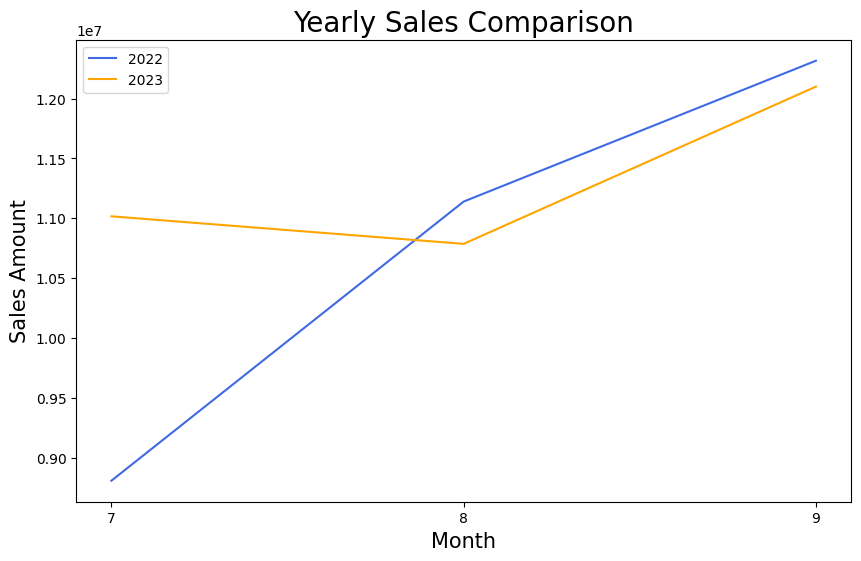

In [84]:
sales_sum_2023 = months_2023.groupby('月份')['銷售金額'].sum()
sales_sum_2022 = months_2022.groupby('月份')['銷售金額'].sum()
plt.figure(figsize=(10, 6))
plt.plot(sales_sum_2022.index, sales_sum_2022.values, label='2022', color = '#4169E1')
plt.plot(sales_sum_2023.index, sales_sum_2023.values, label='2023', color = '#FFA500')
plt.title('Yearly Sales Comparison', fontsize = 20)
plt.xlabel('Month', fontsize = 15)
plt.ylabel('Sales Amount', fontsize = 15)
plt.xticks(ticks=[7, 8, 9], labels=['7', '8', '9'])
plt.legend(loc='best', prop={'size': 10})
plt.show()

**銷售管道 QoQ**

In [ ]:
df_2023.groupby('銷售管道')['銷售金額'].sum()

In [ ]:
df_2022.groupby('銷售管道')['銷售金額'].sum()

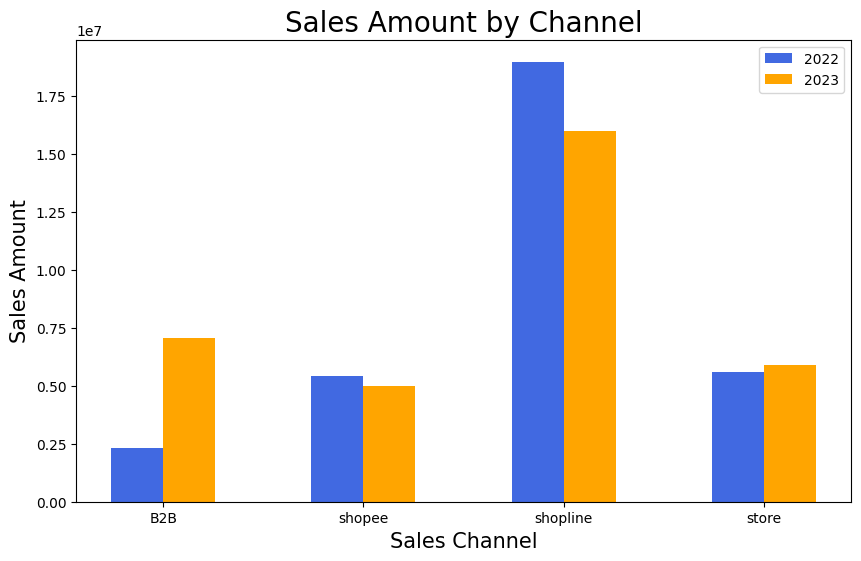

In [97]:
sales_2022 = df_2022.groupby('銷售管道')['銷售金額'].sum()
sales_2023 = df_2023.groupby('銷售管道')['銷售金額'].sum()
x = np.arange(len(sales_2022))
width = 0.26
plt.figure(figsize=(10, 6))
plt.bar(x - width/2, sales_2022, width, label='2022', color = '#4169E1')
plt.bar(x + width/2, sales_2023, width, label='2023', color = '#FFA500')
plt.title('Sales Amount by Channel', fontsize = 20)
plt.xlabel('Sales Channel', fontsize = 15)
plt.ylabel('Sales Amount', fontsize = 15)
plt.xticks(x, sales_2022.index)
plt.legend(loc='best', prop={'size': 10})
plt.show()

## **銷售趨勢/管道小結**


*   現象觀察

>   門市與 B2B 成長，官網與蝦皮下滑

> 移動電源於官網、店面及蝦皮均衰退




*   分析結論

> 後疫情時代，顧客逐漸轉往線下消費

> 商品銷售管道擴散，多角化經營將是未來趨勢







**2023 Q3 各月銷售管道分布**

In [ ]:
df_2023.groupby(['銷售管道', '月份'])['銷售金額'].sum()

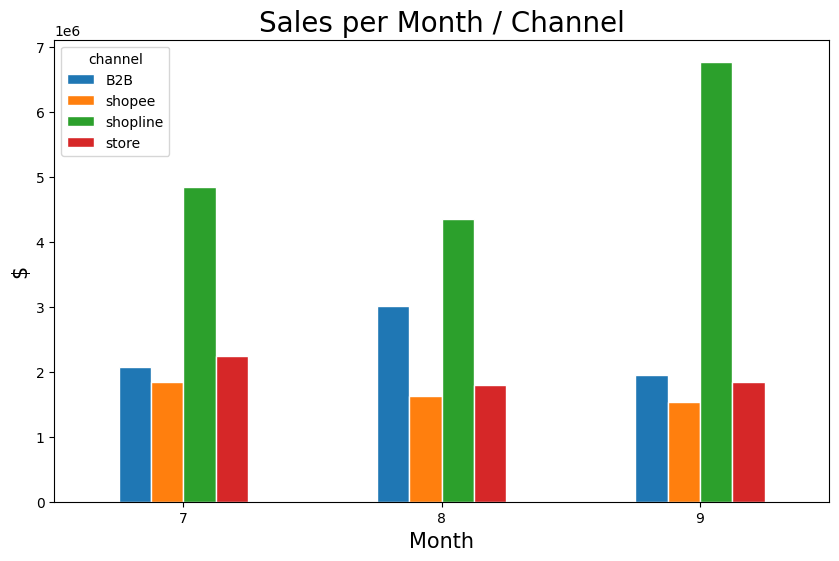

In [73]:
grouped_df = df_2023.groupby(['銷售管道', '月份'])['銷售金額'].sum().reset_index()
plt.figure(figsize=(10, 6))
pivot_df = grouped_df.pivot(index='月份', columns='銷售管道', values='銷售金額')
pivot_df.plot(kind='bar', edgecolor='white', linewidth=1, ax=plt.gca())
plt.title('Sales per Month / Channel', fontsize = 20)
plt.xticks(rotation=0)
plt.xlabel('Month', fontsize = 15)
plt.ylabel('$', fontsize = 15)
plt.legend(title='channel')
plt.show()

## **各月銷售管道小結**

*   現象觀察


> 8、9月特定商品遭下架，衝擊銷售，蝦皮、官網、門市皆受衝擊

> 9月新品連發，GoPro新機於官網熱銷180組

*  分析結論

> GoPro 銷量可觀，未來與廠商議價更有優勢

> 蝦皮潛力高，應盡量配合開券，爭取機車版位及主banner曝光

### **資料合併**

In [ ]:
# 合併為 xlsx 檔
os.chdir('/content/drive/MyDrive/exshop/QoQ/data')  # Colab 換路徑使用

csvfile_old = open('old.csv')     # 開啟 CSV 檔案
raw_data_old = csv.reader(csvfile_old)     # 讀取 CSV 檔案
data_old = list(raw_data_old)              # 轉換成二維串列
wb = openpyxl.Workbook()
sheet_old = wb.create_sheet(f"{q_old}")     # 建立空白的工作表
for i in data_old:
    sheet_old.append(i)                # 逐筆添加到最後一列



csvfile_new = open('new.csv')
raw_data_new = csv.reader(csvfile_new)
data_new = list(raw_data_new)
sheet_new = wb.create_sheet(f"{q_new}")
for i in data_new:
    sheet_new.append(i)



# 刪除不需要的工作表
wb.remove(wb['Sheet'])


# 儲存工作表
file = input('季報名稱：')
wb.save(f"{file}.xlsx")

### **轉換欄位格式**

In [ ]:
# 將月份、銷售數量、單品銷售金額、銷售金額欄位轉換為數字格式
df1 = pd.read_excel(f"/content/drive/MyDrive/exshop/QoQ/data/{file}.xlsx", sheet_name = f"{q_new}")
df1['月份'] = pd.to_numeric(df1['月份'], errors='coerce')
df1['銷售數量'] = pd.to_numeric(df1['銷售數量'], errors='coerce')
df1['單品銷售金額'] = pd.to_numeric(df1['單品銷售金額'], errors='coerce')
df1['銷售金額'] = pd.to_numeric(df1['銷售金額'], errors='coerce')

df2 = pd.read_excel(f"/content/drive/MyDrive/exshop/QoQ/data/{file}.xlsx", sheet_name = f"{q_old}")
df2['月份'] = pd.to_numeric(df2['月份'], errors='coerce')
df2['銷售數量'] = pd.to_numeric(df2['銷售數量'], errors='coerce')
df2['單品銷售金額'] = pd.to_numeric(df2['單品銷售金額'], errors='coerce')
df2['銷售金額'] = pd.to_numeric(df2['銷售金額'], errors='coerce')


# 將更改後的 DataFrame 保存回 Excel 文件
with pd.ExcelWriter(f"/content/drive/MyDrive/exshop/QoQ/data/{file}.xlsx") as writer:
    df1.to_excel(writer, sheet_name= f"{q_new}", index=False)
    df2.to_excel(writer, sheet_name= f"{q_old}", index=False)